<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:5px;background-color:#282c5c;overflow:hidden;font-weight:500"><b>Coursera </b><br>EDA & Insights</div>

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Introduction</div>

# ⌛️ 1. Introduction

## 1.1. About Coursera
Coursera Inc. is a U.S.-based massive open online course provider founded in 2012 by Stanford University computer science professors Andrew Ng and Daphne Koller. Coursera works with universities and other organizations to offer online courses, certifications, and degrees in a variety of subjects.

- Stock price: COUR (NYSE) $15.51 +0.02 (+0.13%) - May 20, 10:12 AM EDT
- Founded: 2012
- Headquarters: California, United States
- Users: 92 million (2021)
- Employees: 1,138 (December 2021)
- Available in: Multilingual (40)
- Founders: Andrew Ng, Daphne Koller


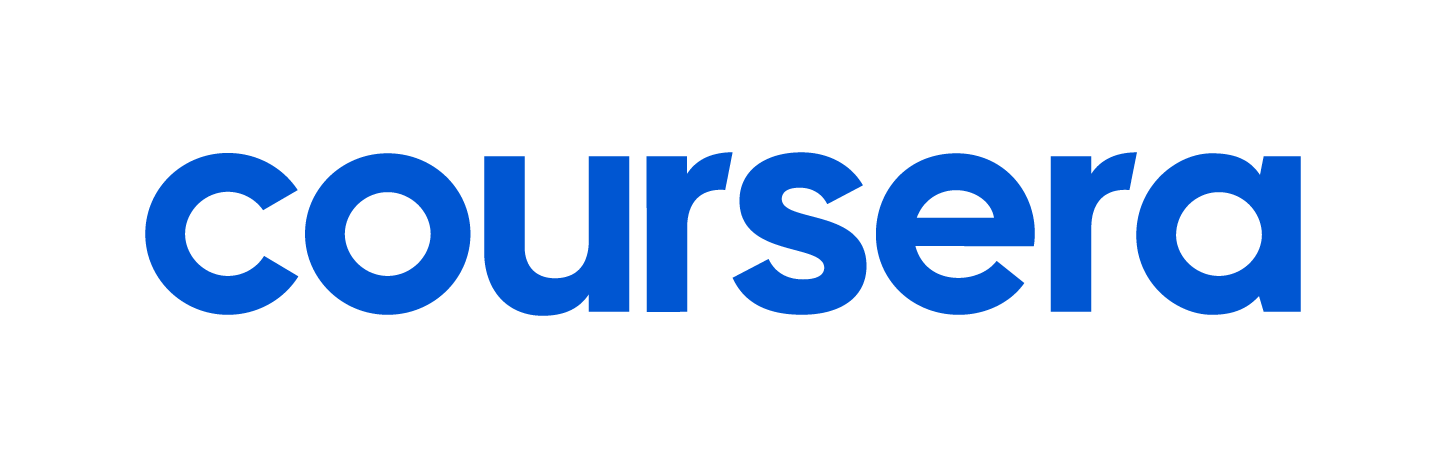

## 1.2. EDA
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Dataset Exploration</div>

# 🧾 2. Dataset Exploration

## Data Brief
Course dataset scrapped from Coursera website. This dataset contains mainly 6 columns and 890 course data. The detailed description:

1. course_title : Contains the course title.
2. course_organization : It tells which organization is conducting the courses.
3. courseCertificatetype : It has details about what are the different certifications available in courses.
4. course_rating : It has the ratings associated with each course.
5. course_difficulty : It tells about how difficult or what is the level of the course.
6. coursestudentsenrolled : It has the number of students that are enrolled in the course.

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Data Loading and Basic Review</div>

# 📚 3. Data Loading and Basic Review

## 3.1. Required Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import os
import seaborn as sns
from scipy import stats
import warnings

## 3.2. Configuration

In [2]:
import os
warnings.filterwarnings('ignore')

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500"> Basic Exploration</div>

# 🧮 4.  Basic Exploration

In [3]:
df=pd.read_csv("/kaggle/input/coursera-course-dataset/coursea_data.csv")

In [4]:
df=df.drop("Unnamed: 0",axis=1)

So, 1 numarical object only. But, we can turn some others to numarical too.

In [5]:
df.describe(include=['object']).T

,count,unique,top,freq
course_title,891,888,Developing Your Musicianship,2
course_organization,891,154,University of Pennsylvania,59
course_Certificate_type,891,3,COURSE,582
course_difficulty,891,4,Beginner,487
course_students_enrolled,891,205,120k,22


Mean course rating is 4.677329. Quite high, as the rating can be given from 0-5. Minimum is 3.3, highest is 5 - proves so.

## 4.2 Initial plan for data exploration

Data Exploration
1. Ploting course_rating to get a overview of the distribution.
2. analyzing course Certificate types values.

Data Cleaning
1. Deleting first Unnamed column
2. Deleting course name - not necessary now; as all the values are unique

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidd[](http://)en;font-weight:500">Feature Engineering</div>

# ⌛️ 5. Feature Engineering

## 5.1. Modifying course_students_enrolled column

As we can see that the column course_students_enrolled is of the type object. That is due to the "k" or "m" after the number. We need to deal with that before starting any analysis.

In [6]:
df_fe1=df.copy()

In [7]:
std_enroll = []
for i in range(0, len(df_fe1)):
    try:
        num = df_fe1['course_students_enrolled'].str.split('k')[i][0]
        num = float(num) * 1000 
        std_enroll.append(num)
    except:
        num = df_fe1['course_students_enrolled'].str.split('m')[i][0]
        num = float(num) * 1000000
        std_enroll.append(num)
df_fe1['course_students_enrolled'] = std_enroll
df_fe1['course_students_enrolled_modified'] = df_fe1['course_students_enrolled'].astype(float)
df_fe1.drop('course_students_enrolled', axis=1,inplace=True)

In [8]:
df_fe1

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled_modified
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300.0
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000.0
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000.0
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000.0
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000.0
...,...,...,...,...,...,...
886,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,52000.0
887,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,21000.0
888,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,30000.0
889,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9800.0


## 5.2. Label Encoding course_difficulty column

In [9]:
course_difficulty_modifier = {'Beginner' : 0, 'Intermediate': 1, 'Mixed':0.5, 'Advanced': 2}
df_fe1['course_difficulty_modified']=df_fe1['course_difficulty'].map(course_difficulty_modifier)
df_fe1 =df_fe1.drop(['course_difficulty'],axis=1)
df_fe1

,course_title,course_organization,course_Certificate_type,course_rating,course_students_enrolled_modified,course_difficulty_modified
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,5300.0,0.0
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,17000.0,1.0
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,130000.0,0.5
3,A Law Student's Toolkit,Yale University,COURSE,4.7,91000.0,0.5
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,320000.0,0.5
...,...,...,...,...,...,...
886,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,52000.0,1.0
887,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,21000.0,0.5
888,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,30000.0,1.0
889,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,9800.0,1.0


<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Data Exploration</div>

# 📉 6. Data Exploration

## 6.1. Basic Rating distribution :

Text(0.5, 1.0, '\nCourse Rating Distribution\n')

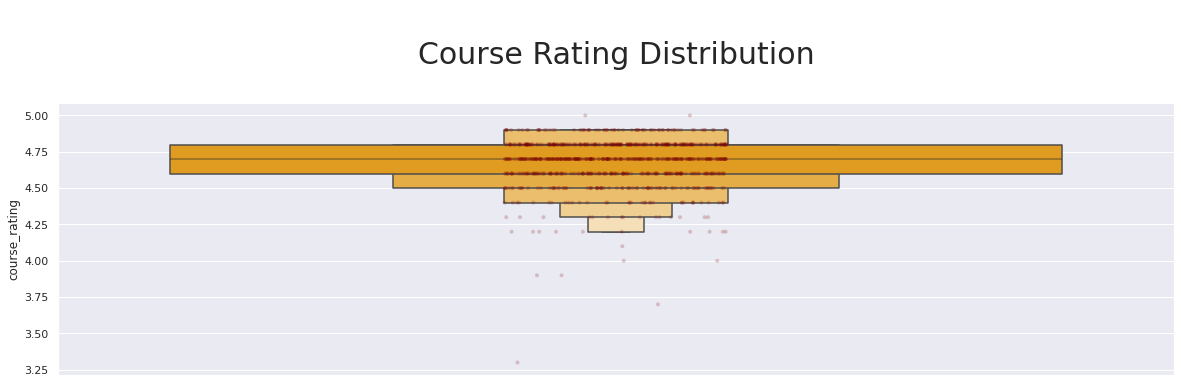

In [10]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.boxenplot( y="course_rating", data=df,
                   showfliers=False,color='orange')
ax = sns.stripplot( y="course_rating", data=df,
                   size=4, color="maroon",alpha=0.2)
ax.axes.set_title("\nCourse Rating Distribution\n",fontsize=30)

### Ploting course_rating to get a overview of the distribution.

Text(0.5, 1.0, '\n Course Rating Distribution\n')

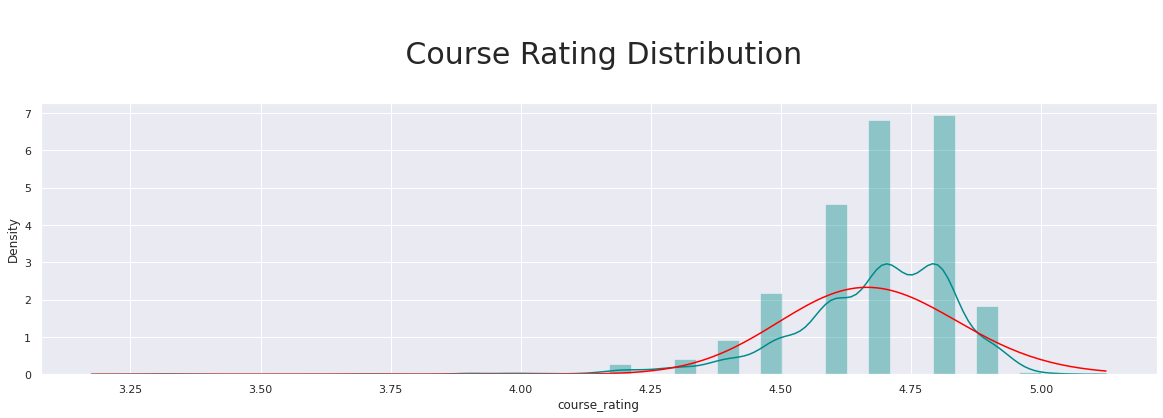

In [11]:
sns.set(rc={'figure.figsize':(20,5)})
p=sns.distplot(df['course_rating'],color='darkcyan',fit_kws={"color":"red"},fit=stats.gamma, label="label 1")
p.axes.set_title("\n Course Rating Distribution\n",fontsize=30)

#### Findings:
Average course rating is quite higher, compared to lowest and maximum value.

## 6.2. Frequency based on difficulty.

### **Does course difficulty affect rating?**
Do courses with advanced level of difficulty get lower rating? Is there any relation between the two?

Text(0.5, 1.0, '\nFrequency Distribution based on difficulty\n')

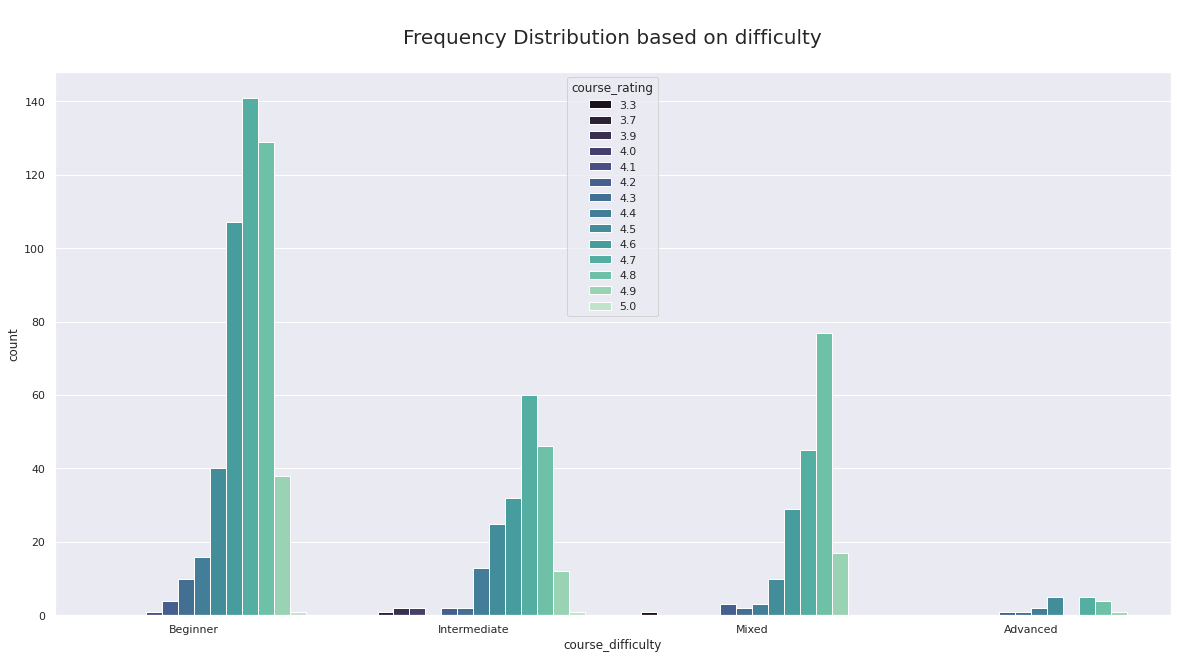

In [12]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(hue="course_rating", x="course_difficulty", data=df,palette="mako")
ax.axes.set_title("\nFrequency Distribution based on difficulty\n",fontsize=20)

#### Insight: 
Advanced courses' rating has some ups-and downs; maybe due to low frequency.<br>
Beginner course has distribution quite similiar to total rating chart.<br>
Intermidiate course's rating top is not as sharp of others, that may say - as the participants has some knowledge on the topic, they can judge better and being critical.


## 6.3. Rating distribution per course type :

Text(0, 0.5, 'Count')

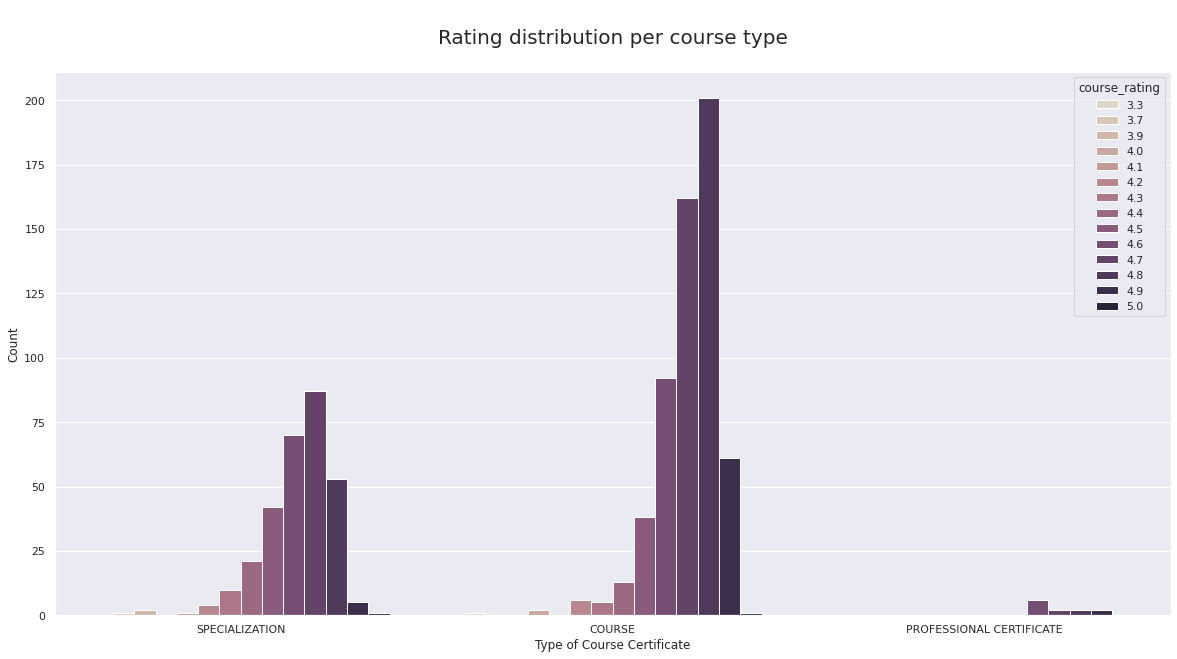

In [13]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(hue="course_rating", x="course_Certificate_type", data=df,palette="ch:s=-.2,r=.6")
ax.axes.set_title("\nRating distribution per course type\n",fontsize=20)
ax.axes.set_xlabel('Type of Course Certificate')
ax.axes.set_ylabel('Count')

#### Findings and Insight:
1. Specializations has lower mean value than courses, but the distribution is interesting. specialization has good distribution values on right, but normal courses are on left.

## 6.4. Rating distribution per course type : Combined

Text(0.5, 1.0, '\nRating distribution per course type : Combined\n')

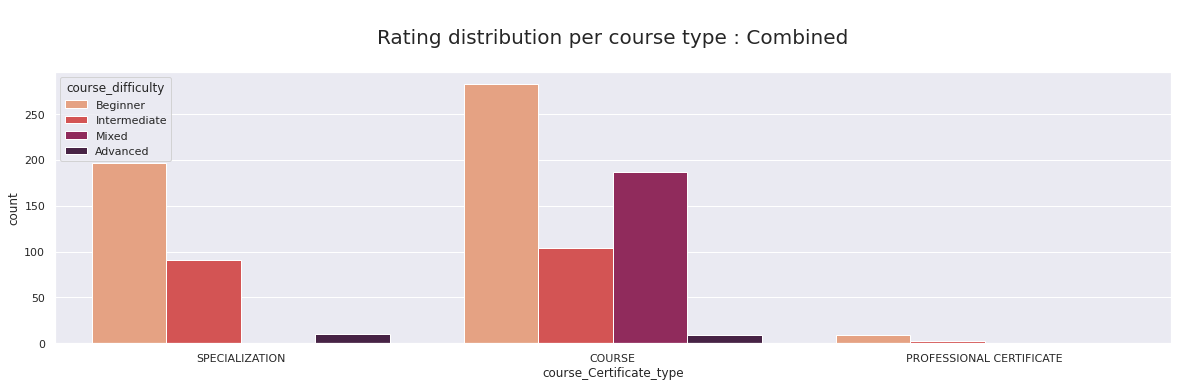

In [14]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(hue="course_difficulty", x="course_Certificate_type", data=df,palette="rocket_r")
ax.axes.set_title("\nRating distribution per course type : Combined\n",fontsize=20)

#### Findings:
Mixed - Course has a unstable distribution, othes have normal distribution.

## 6.5. Analyzing course Certificate types values.

### **Does course difficulty affect number of students enrolled?**
For this we will check the average number of students enrolled grouping by difficulty.

Text(0, 0.5, 'Number of students')

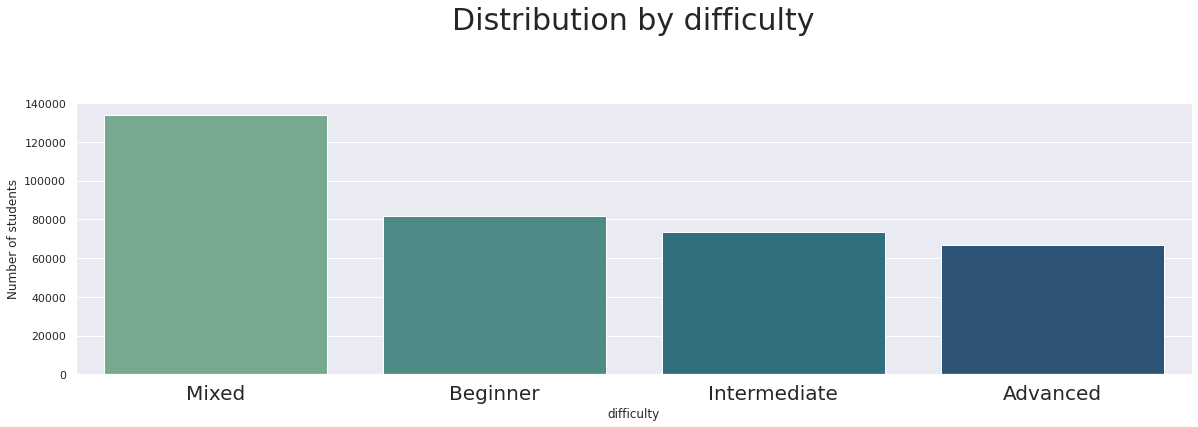

In [15]:
stud_dict = round(df_fe1.groupby('course_difficulty_modified')['course_students_enrolled_modified'].mean(), 0).to_dict()
stud_dict = {k: v for k, v in sorted(stud_dict.items(), key=lambda item: item[1], reverse=True)}
ini_list = ['Mixed', 'Beginner', 'Intermediate', 'Advanced']
stud_dict = dict(zip(ini_list, list(stud_dict.values())))
stud_dict

diff_stud = pd.DataFrame({'difficulty':list(stud_dict.keys()), 'avg_students':list(stud_dict.values())})
diff_stud

sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=20,rotation='horizontal')
p=sns.barplot(x='difficulty',y="avg_students",data=diff_stud, palette="crest")
p.axes.set_title("Distribution by difficulty\n\n", fontsize=30)
p.axes.set_ylabel('Number of students')

Well, there are more number of students enrolled per Mixed difficulty level course rather than Beginner.

### **Does certificate type impact number of students enrolled?**
This could be a very important question for Coursera and for the organizations who are making courses. What type of certificate should be there for maximum student enrollment and how should Coursera optimize the course recommendations based on the type of certificates?

Text(0.5, 0, 'Course Certificate Type')

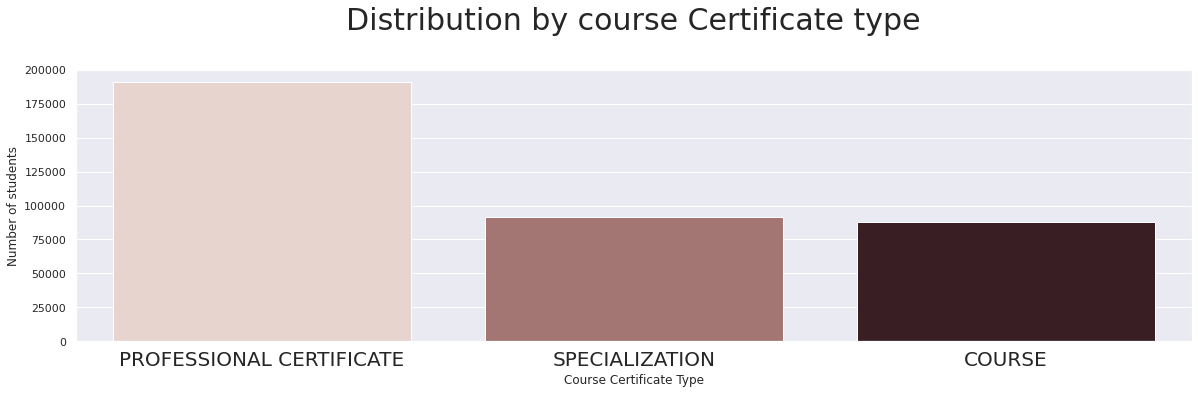

In [16]:
cert_dict = round(df_fe1.groupby('course_Certificate_type')['course_students_enrolled_modified'].mean(), 0).to_dict()
cert_dict = {k: v for k, v in sorted(cert_dict.items(), key=lambda item: item[1], reverse=True)}
cert_dict

sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=20,rotation='horizontal')
p=sns.barplot(x='course_Certificate_type',y="avg_students",palette="ch:s=.8,r=.1",data=pd.DataFrame({'course_Certificate_type':list(cert_dict.keys()), 'avg_students':list(cert_dict.values())}))
p.axes.set_title("Distribution by course Certificate type\n", fontsize=30)
p.axes.set_ylabel('Number of students')
p.axes.set_xlabel('Course Certificate Type')

### **Number of students enrolled vs. course rating**
Last but not the least, if there a large number of students enrolled in your course, does that impact the course rating?

Text(0.5, 0, 'Num of students enrolled')

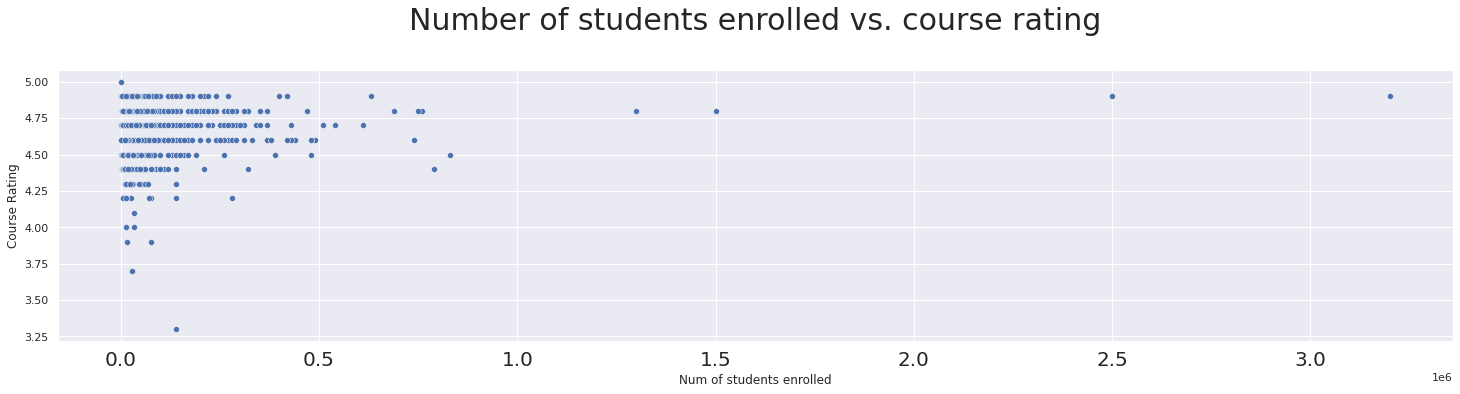

In [17]:
sns.set(rc={'figure.figsize':(25,5)})
plt.xticks(fontsize=20,rotation='horizontal')
p=sns.scatterplot(x='course_students_enrolled_modified',y="course_rating",data=df_fe1, palette="mako")
p.axes.set_title("Number of students enrolled vs. course rating\n", fontsize=30)
p.axes.set_ylabel('Course Rating')
p.axes.set_xlabel('Num of students enrolled')

There is a small datapoint at the bottom which says that less number of students meaning low rating, but this does not prove our assumption as there is no strong relation. We can check how strong is the relation by finding correlation between the two.

In [18]:
df_fe1.corr()

,course_rating,course_students_enrolled_modified,course_difficulty_modified
course_rating,1.00000,0.071090,-0.089810
course_students_enrolled_modified,0.07109,1.000000,-0.004012
course_difficulty_modified,-0.08981,-0.004012,1.000000


You see, there is a very small positive correlation, hence its not enough to prove our assumption that more number of students enrolled in your course does lead to higher rating.

#### Findings:
Course Counts:
- *Beginner > Intermidiate > Advanced*. Not enough data for advanced courses.
- *Courses > Specialization > Professional certificate.* Not enough data for Professional certificates.

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">EDA of newly engineered columns</div>

## 8. Data Exploration

In [19]:
df_fe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   course_title                       891 non-null    object 
 1   course_organization                891 non-null    object 
 2   course_Certificate_type            891 non-null    object 
 3   course_rating                      891 non-null    float64
 4   course_students_enrolled_modified  891 non-null    float64
 5   course_difficulty_modified         891 non-null    float64
dtypes: float64(3), object(3)
memory usage: 41.9+ KB


In [20]:
df_fe1[['course_difficulty_modified','course_students_enrolled_modified']].describe()

,course_difficulty_modified,course_students_enrolled_modified
count,891.000000,8.910000e+02
mean,0.369809,9.055208e+04
std,0.472738,1.819365e+05
min,0.000000,1.500000e+03
25%,0.000000,1.750000e+04
50%,0.000000,4.200000e+04
75%,0.500000,9.950000e+04
max,2.000000,3.200000e+06


course_students_enrolled_modified has some empty columns, so we have to fill them. 

Text(0.5, 1.0, '\n Course_students_enrolled Distribution\n')

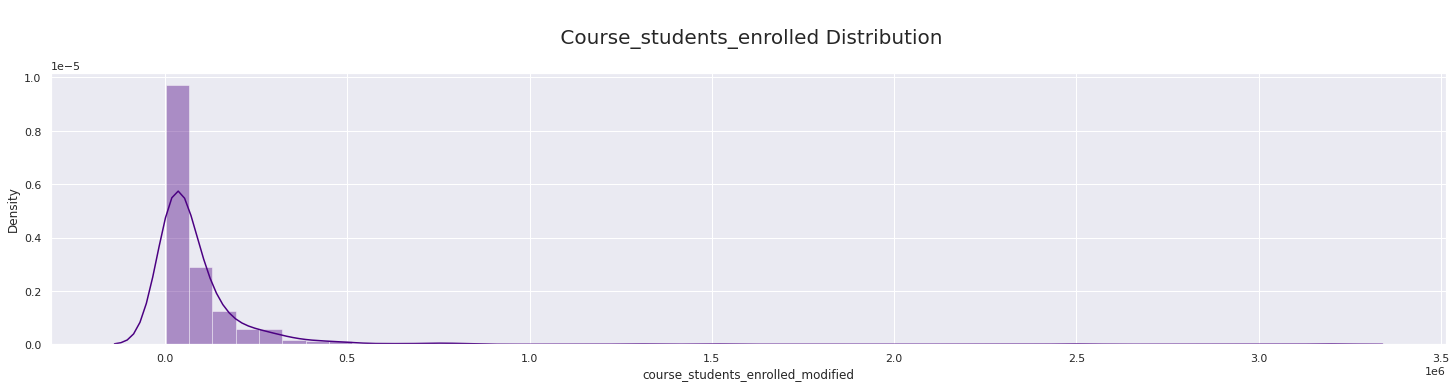

In [21]:
sns.set(rc={'figure.figsize':(25,5)})
p=sns.distplot(df_fe1['course_students_enrolled_modified'],color='indigo')
p.axes.set_title("\n Course_students_enrolled Distribution\n",fontsize=20)

so , most of the frequencies are in between 0-10, so, using average-1; so avoid the effect of outliers.

In [22]:
df_fe1['course_students_enrolled_modified'].fillna((df_fe1['course_students_enrolled_modified'].mean()-1), inplace=True)
df_fe1[['course_difficulty_modified','course_students_enrolled_modified']].describe()

,course_difficulty_modified,course_students_enrolled_modified
count,891.000000,8.910000e+02
mean,0.369809,9.055208e+04
std,0.472738,1.819365e+05
min,0.000000,1.500000e+03
25%,0.000000,1.750000e+04
50%,0.000000,4.200000e+04
75%,0.500000,9.950000e+04
max,2.000000,3.200000e+06


In [23]:
df_numaric=df_fe1.select_dtypes(include=np.number)

# 9. University wise analysis
### **Which organization has the most number of courses?**
Here, we want to check two things. First, which organization has the most number of courses on Coursera. Next, we will find the correlation between the mean number of students enrolled per university to the number of courses offered by the university. This is just a basic analysis which could show the organizations which dominate on Coursera.

In [24]:
g_uni=df_fe1.groupby("course_organization")["course_students_enrolled_modified",'course_rating'].agg({"course_students_enrolled_modified":'size',"course_students_enrolled_modified":'mean','course_rating':'mean'}).reset_index()

In [25]:
g_uni_2=df_fe1.groupby("course_organization")["course_students_enrolled_modified"].agg({'size'}).reset_index()
g_uni['size']=g_uni_2['size']
g_uni_final=g_uni[g_uni_2['size']> 10]
g_uni_final.sort_values(by=["course_students_enrolled_modified","course_rating"],ascending=False);

In [26]:
g_uni_final

,course_organization,course_students_enrolled_modified,course_rating,size
9,Berklee College of Music,92000.000000,4.807143,14
20,Duke University,141700.000000,4.664286,28
34,Google Cloud,76597.058824,4.582353,34
38,IBM,134381.818182,4.613636,22
48,Johns Hopkins University,153532.142857,4.660714,28
76,Rice University,56615.384615,4.676923,13
85,Stanford University,303375.000000,4.768750,16
109,Universidad Nacional Autónoma de México,86278.571429,4.750000,14
119,University of Alberta,41800.000000,4.727273,11
122,"University of California, Davis",60890.476190,4.619048,21


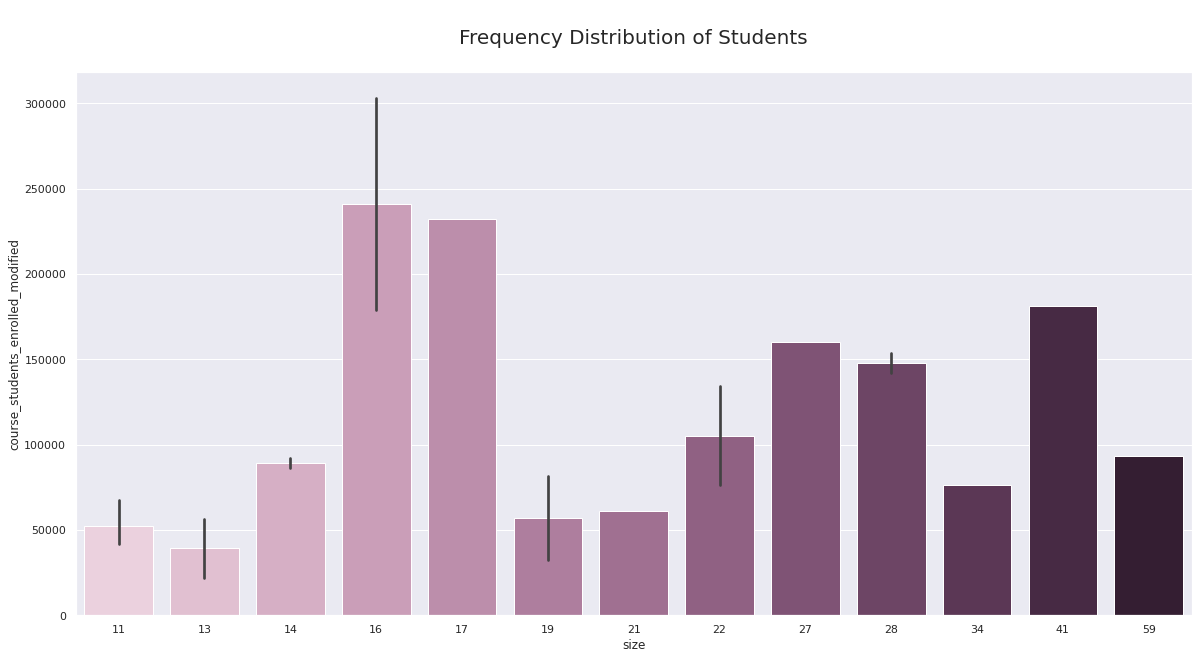

In [27]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(x="size", y="course_students_enrolled_modified", data=g_uni_final,palette="ch:s=.4,r=.1")
ax.axes.set_title("\nFrequency Distribution of Students\n",fontsize=20);

University of Pennsylvania dominates here, with just about 59 courses, followed by University of Michigan who has over 41 courses on Coursera!


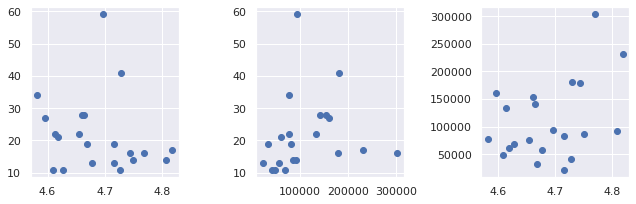

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))
axes[0].scatter(g_uni_final["course_rating"], g_uni_final['size'])
axes[1].scatter(g_uni_final["course_students_enrolled_modified"], g_uni_final['size'])
axes[2].scatter(g_uni_final["course_rating"], g_uni_final["course_students_enrolled_modified"])
fig.tight_layout()
plt.show()

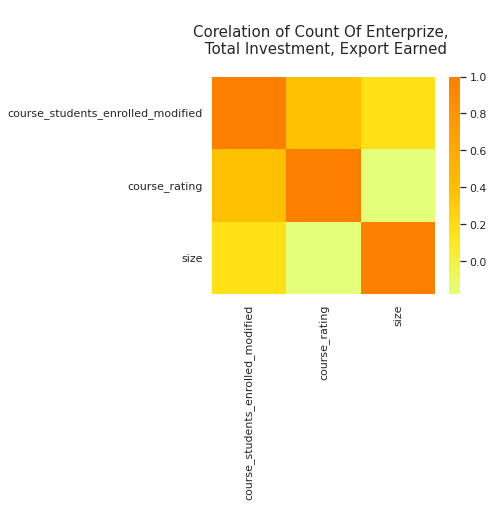

In [29]:
corrM = g_uni_final.corr()
sns.set(rc={'figure.figsize':(5,4)})
p=sns.heatmap(corrM, 
        xticklabels=corrM.columns,
        yticklabels=corrM.columns,
        cmap="Wistia")
p=p.axes.set_title("\nCorelation of Count Of Enterprize, \n Total Investment, Export Earned\n",fontsize=15)

#### Findings
1. Mean number of students enrolled per university has some positive correlation to number of courses offered by the university. The more courses are offered, the more students are enrolled in average.

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Top Rated Course Provider</div>

# 📕 10. Top Rated Course Provider

In [30]:
df['course_title']=df['course_title']

In [31]:
g_uni['overall_rating']=(g_uni['course_students_enrolled_modified']/g_uni['course_students_enrolled_modified'].max())*3+(g_uni['course_rating']/g_uni['course_rating'].max())*7
g_uni=g_uni.sort_values(by='overall_rating',ascending=False)

In [32]:
g_uni.overall_rating.describe().T

count    154.000000
mean       7.278583
std        0.597756
min        6.231361
25%        6.936129
50%        7.165381
75%        7.532439
max        9.812500
Name: overall_rating, dtype: float64

In [33]:
g_unix=g_uni[g_uni['overall_rating']>=8.5]
g_unix

,course_organization,course_students_enrolled_modified,course_rating,size,overall_rating
85,Stanford University,303375.000000,4.768750,16,9.812500
148,Yale University,232470.588235,4.817647,17,9.181197
58,McMaster University,230000.000000,4.800000,1,9.131556
33,Google - Spectrum Sharing,210000.000000,4.900000,1,9.076638
151,École Polytechnique,190000.000000,4.800000,1,8.736006
52,Ludwig-Maximilians-Universität München (LMU),192500.000000,4.750000,2,8.689299
135,University of Michigan,181407.317073,4.729268,41,8.549989
150,deeplearning.ai,178962.500000,4.743750,16,8.546501


Text(0.5, 1.0, '\nBest course providers\n\n')

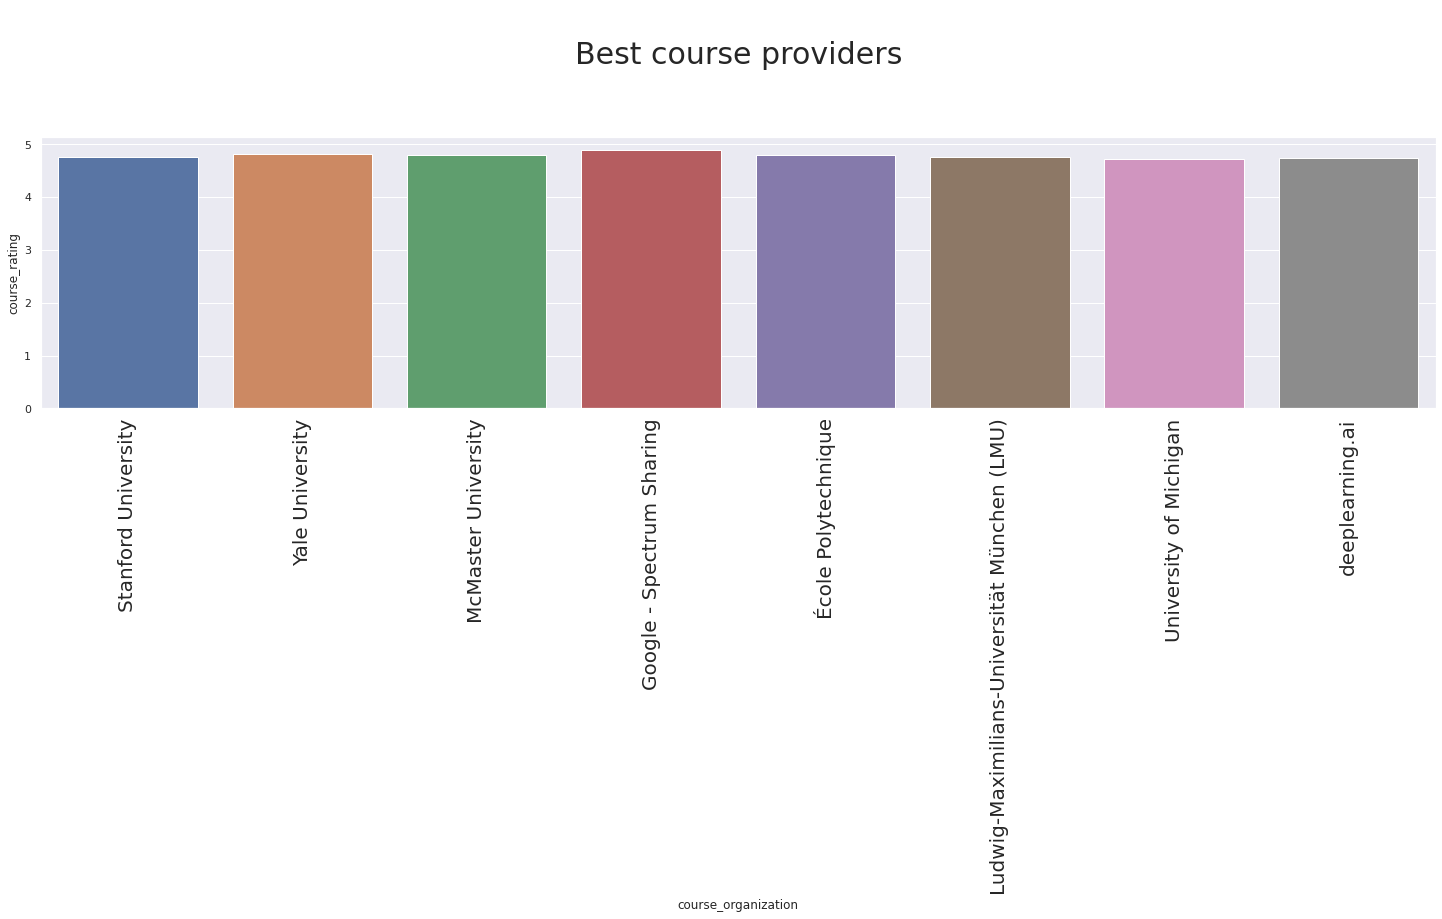

In [34]:
sns.set(rc={'figure.figsize':(25,5)})
plt.xticks(fontsize=20,rotation='vertical')
p=sns.barplot(x='course_organization',y="course_rating",data=g_unix,hue_order=g_uni['overall_rating'])
p.axes.set_title("\nBest course providers\n\n", fontsize=30)

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Key Findings & Insights</div>

# 📒 13. Key Findings & Insights
1. Organizations with more than 10 courses on Coursera are not present in the top 5 organizations list with highest rating.
2. Average course rating is quite higher, compared to lowest and maximum value. So, the cours quality is being maintained.
3. Advanced courses' rating has some ups-and downs; maybe due to low frequency.
4. Beginner course has distribution quite similiar to total rating chart, as big portion of the data is from them, and he number of beginner level courses are high.
5. Intermidiate course's rating top is not as sharp of others, that may say - as the participants has some knowledge on the topic, they can judge better and being critical.
6. Specializations has lower mean value than courses, but the distribution is interesting. specialization has good distribution values on right, but normal courses are on left.
7. No effective coorelation between course_difficulty,course_students_enrolled, course rating.
8. No effective coorelation between course_students_enrolled, course rating per university.
9. Mean number of students enrolled per university has some positive corelation to number of courses offered by the university. The more courses are offered, the more students are enroled in average.